In [1]:
#https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

# <font color="#FA8072">Importing Packages</font>

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import os;
import gc

%matplotlib inline

# <font color="#FA8072">Reading Data</font> 

In [2]:
folderPath = 'D:/Rep/MyLearning/articles/24Tutorials/3_BigMartSales';

In [3]:
trainFileName = 'train.csv'
trainFilePath = os.path.join(folderPath,trainFileName)

In [4]:
testFileName = 'test.csv';
testFilePath = os.path.join(folderPath,testFileName);

In [5]:
train = pd.read_csv(trainFilePath);

In [6]:
test = pd.read_csv(testFilePath)

In [7]:
data = pd.concat([train,test])

## <font color="F98866">Data Cleaning</font> 

In [8]:
data = data[["Item_Identifier","Item_Type","Item_Fat_Content","Item_Visibility","Item_MRP","Item_Weight","Outlet_Establishment_Year","Outlet_Identifier","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Outlet_Sales"]]

In [9]:
train["Item_Type"] = train["Item_Type"].astype("category") 
train["Item_Fat_Content"] = train["Item_Fat_Content"].astype("category") 
train["Item_Visibility"] = train["Item_Visibility"].astype(np.float32) 
train["Item_MRP"] = train["Item_MRP"].astype(np.float16)
train["Item_Weight"] = train["Item_Weight"].astype(np.float16)
train["Outlet_Establishment_Year"] = train["Outlet_Establishment_Year"].astype(np.int16)
train["Outlet_Location_Type"] = train["Outlet_Location_Type"].astype("category")
train["Outlet_Size"] = train["Outlet_Size"].astype("category")
train["Outlet_Type"] = train["Outlet_Type"].astype("category")
train["Item_Outlet_Sales"] = train["Item_Outlet_Sales"].astype(np.float32)

In [10]:
data["Item_Type"] = data["Item_Type"].astype("category") 
data["Item_Fat_Content"] = data["Item_Fat_Content"].astype("category") 
data["Item_Visibility"] = data["Item_Visibility"].astype(np.float32) 
data["Item_MRP"] = data["Item_MRP"].astype(np.float16)
data["Item_Weight"] = data["Item_Weight"].astype(np.float16)
data["Outlet_Establishment_Year"] = data["Outlet_Establishment_Year"].astype(np.int16)
data["Outlet_Location_Type"] = data["Outlet_Location_Type"].astype("category")
data["Outlet_Size"] = data["Outlet_Size"].astype("category")
data["Outlet_Type"] = data["Outlet_Type"].astype("category")
data["Item_Outlet_Sales"] = data["Item_Outlet_Sales"].astype(np.float32)

In [11]:
data.size

170448

## <font color='#2096BA'>Transformation, Missing Value treatment, Outlier treatment</font>

In [12]:
data.apply(lambda x:sum(x==0),axis=0) 

Item_Identifier                0
Item_Type                      0
Item_Fat_Content               0
Item_Visibility              879
Item_MRP                       0
Item_Weight                    0
Outlet_Establishment_Year      0
Outlet_Identifier              0
Outlet_Location_Type           0
Outlet_Size                    0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [13]:
data.apply(lambda x:sum(x.isnull()),axis=0) 

Item_Identifier                 0
Item_Type                       0
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#### 1. Creating new variable Outlet_Years

In [14]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']

#### 2. Regularizing Item Fat content

In [15]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})                                                

#### 3. Handling Items with 0 visibility

In [16]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)
miss_bool_train = (train['Item_Visibility'] == 0)
print('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
train.loc[miss_bool_train,'Item_Visibility'] = train.loc[miss_bool_train,'Item_Identifier'].apply(lambda x:visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [17]:
#data.pivot_table(values='Item_Visibility', index='Item_Identifier')
#visibility_avg.loc['FDX07']

#### 4. Handling Item Weight null values

In [18]:
tempData = data[data['Item_Weight'].notnull()]
weight_avg = tempData.pivot_table(values='Item_Weight', index='Item_Identifier')
#Impute null values with mean weight of that product:
miss_bool = (data['Item_Weight'].isnull())
miss_bool_train = (train['Item_Weight'].isnull())
print('Number of null values weight: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: weight_avg.loc[x])
train.loc[miss_bool_train,'Item_Weight'] = train.loc[miss_bool_train,'Item_Identifier'].apply(lambda x: weight_avg.loc[x])

print('Number of null values after modification: %d'%sum(data['Item_Weight'].isnull()))

Number of null values weight: 2439
Number of null values after modification: 0


#### 5. Handling Outlet Size null values

In [19]:
#train.groupby(['Outlet_Type','Outlet_Size','Outlet_Location_Type']).agg({'Item_Outlet_Sales':'mean'})

In [20]:
#tempData = data[data['Outlet_Size'].isnull()]
#tempData.groupby(['Outlet_Type','Outlet_Location_Type']).agg({'Outlet_Identifier':'count'})

In [21]:
miss_bool = (data['Outlet_Size'].isnull())
print('Number of null values outletsize: %d'%sum(miss_bool))

Number of null values outletsize: 4016


In [22]:
miss_bool= (data['Outlet_Type']=='Grocery Store') & (data['Outlet_Size'].isnull())
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Identifier'].apply(lambda x: 'Small')
miss_bool= ((data['Outlet_Type']=='Supermarket Type2') | (data['Outlet_Location_Type']=='Tier 2')) & data['Outlet_Size'].isnull()
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Identifier'].apply(lambda x: 'Small')

#miss_bool= ((data['Outlet_Type']=='Supermarket Type2') | (data['Outlet_Type']=='Supermarket Type3')) & data['Outlet_Size'].isnull()
#data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Identifier'].apply(lambda x: 'Medium')
#miss_bool= ((data['Outlet_Location_Type']=='Tier 1') | (data['Outlet_Location_Type']=='Tier 1')) & data['Outlet_Size'].isnull()
#data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Identifier'].apply(lambda x: 'Small')
#miss_bool= ((data['Outlet_Location_Type']=='Tier 3')) & data['Outlet_Size'].isnull()
#data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Identifier'].apply(lambda x: 'High')

miss_bool_train= (train['Outlet_Type']=='Grocery Store') & (train['Outlet_Size'].isnull())
train.loc[miss_bool_train,'Outlet_Size'] = train.loc[miss_bool_train,'Outlet_Identifier'].apply(lambda x: 'Small')
miss_bool_train= ((train['Outlet_Type']=='Supermarket Type2') | (train['Outlet_Location_Type']=='Tier 2')) & train['Outlet_Size'].isnull()
train.loc[miss_bool_train,'Outlet_Size'] = train.loc[miss_bool_train,'Outlet_Identifier'].apply(lambda x: 'Small')

In [23]:
print('Number of null values after modification: %d'%sum(data['Outlet_Size'].isnull()))

Number of null values after modification: 0


#### 6. Making Non Consumable 

## <font color="80BD9E">Data Exploration</font>

#### 1. Effect of Item_Type on sales

In [14]:
data.groupby("Item_Type")["Item_Identifier"].nunique()

Item_Type
Baking Goods             119
Breads                    45
Breakfast                 20
Canned                   120
Dairy                    125
Frozen Foods             155
Fruits and Vegetables    220
Hard Drinks               40
Health and Hygiene        95
Household                170
Meat                      80
Others                    30
Seafood                   10
Snack Foods              220
Soft Drinks               80
Starchy Foods             30
Name: Item_Identifier, dtype: int64

In [15]:
train.groupby("Item_Type").agg({'Item_Identifier':'count','Item_Outlet_Sales':'mean'}).sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Outlet_Sales
Item_Type,,
Starchy Foods,148,2374.332764
Seafood,64,2326.065918
Fruits and Vegetables,1232,2289.009521
Snack Foods,1200,2277.321777
Household,910,2258.784180
Dairy,682,2232.542480
Canned,649,2225.194824
Breads,251,2204.132324
Meat,425,2158.978027


#### 2. Effect of Item Visibility on sale

In [16]:
data[data["Item_Visibility"]>0]["Item_Visibility"].min()

0.003574698

In [17]:
data['Visibility_Level'] = np.digitize(data["Item_Visibility"],np.arange(0.00000000001,0.4,0.05))

In [18]:
train['Visibility_Level'] = np.digitize(train["Item_Visibility"],np.arange(0.00000000001,0.4,0.05))

In [19]:
train.groupby("Visibility_Level").agg({'Item_Identifier':'count','Item_Outlet_Sales':'mean','Item_Visibility':'max'}).sort_values(by='Item_Outlet_Sales',ascending=False)
result = train.groupby("Visibility_Level").agg({'Item_Identifier':'count','Item_Outlet_Sales':'mean'}).rename(columns={'Item_Outlet_Sales':'avg_sales'})['avg_sales'].rank(method="dense",ascending=False)

In [20]:
#train = pd.concat((train,result),axis=1,join='inner')

In [21]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Level
0,FDA15,9.296875,Low Fat,0.016047,Dairy,249.75000,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939,1
1,DRC01,5.921875,Regular,0.019278,Soft Drinks,48.28125,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791,1
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.62500,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020,1
3,FDX07,19.203125,Regular,0.000000,Fruits and Vegetables,182.12500,OUT010,1998,NaN,Tier 3,Grocery Store,732.380005,0
4,NCD19,8.929688,Low Fat,0.000000,Household,53.87500,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,0


#### 3. Effect of Outlet size

In [27]:
outletSizeSales = train.groupby('Outlet_Size').agg({'Item_Outlet_Sales':'mean'}).unstack()

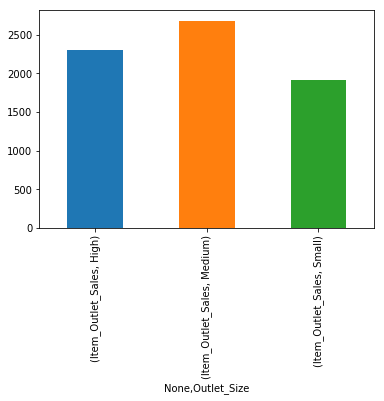

In [28]:
outletSizeSales.plot(kind='bar')

#### 4. Effect of Outlet type

In [ ]:
train.groupby(['Outlet_Type'])['Item_Identifier'].nunique()

In [35]:
train.groupby(['Outlet_Type','Outlet_Size','Outlet_Location_Type']).agg({'Item_Outlet_Sales':'mean'})

Item_Outlet_Sales
Outlet_Type       Outlet_Size Outlet_Location_Type                   
Grocery Store     Small       Tier 1                       340.329712
Supermarket Type1 High        Tier 3                      2298.995361
                  Medium      Tier 1                      2348.354736
                  Small       Tier 1                      2277.844238
                              Tier 2                      2438.841797
Supermarket Type2 Medium      Tier 3                      1995.498779
Supermarket Type3 Medium      Tier 3                      3694.038574

,,Outlet_Identifier
Outlet_Type,Outlet_Location_Type,
Supermarket Type1,Tier 2,3091


In [38]:
train.groupby(['Outlet_Type'])['Outlet_Identifier'].nunique()

Outlet_Type
Grocery Store        2
Supermarket Type1    6
Supermarket Type2    1
Supermarket Type3    1
Name: Outlet_Identifier, dtype: int64

1. Grocery store is present only in Tier 1 cities
2. Supermarket Type2 and Type3 are present only in Tier 3 cities and are of medium size
3. High Outlet Size is present only in Tier 3 city and only Supermarket Type1 can have High outlet size
4. Supermarket Type3 have significantly higher sales than SuperMarket Type2
5. Outlet Size doesn't look to have any significant effect on Item_Outlet_Sales

6. There are only 10 Outlets

#### 4. Effect of Item fat content

In [41]:
train.groupby(['Item_Fat_Content'])['Outlet_Identifier'].nunique()

Item_Fat_Content
LF         10
Low Fat    10
Regular    10
low fat    10
reg        10
Name: Outlet_Identifier, dtype: int64

## <font color="#135589">Hypothesis Testing</font> 

### <font color="#2893D5">1. Products with low weight should have higher sales</font> 

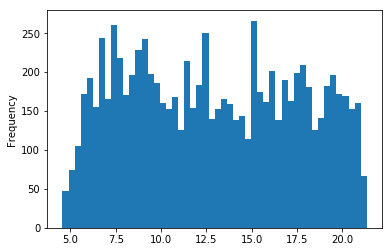

In [27]:
train['Item_Weight'].plot(kind='hist',bins=50)

In [46]:
train['Item_Weight_Groups'] = np.digitize(train['Item_Weight'],np.arange(0,22,8))

In [48]:
train.groupby(by='Item_Weight_Groups').agg({'Item_Outlet_Sales':'mean'})

,Item_Outlet_Sales
Item_Weight_Groups,
1,2142.193359
2,2171.312988
3,2222.003662


In [55]:
train = train.drop(['Item_Weight_Groups'],axis = 1)

<font color='#FF7E5F'>
Item Weight does not looks to have any effect of sales
</font>

### <font color="#2893D5">2. Products having low fat content should have higher sales</font>

In [59]:
train.groupby(by=['Outlet_Location_Type','Item_Fat_Content']).agg({'Item_Outlet_Sales':'mean'})

Item_Outlet_Sales
Outlet_Location_Type Item_Fat_Content                   
Tier 1               Low Fat                 1836.848755
                     Regular                 1949.660278
Tier 2               Low Fat                 2285.675537
                     Regular                 2395.006836
Tier 3               Low Fat                 2278.856201
                     Regular                 2281.042725

<font color='#FF7E5F'>
Regular products seems to have higher sales in comparison to low fat content products.
</font>

### <font color="#2893D5">3. High Visibility means high sales</font>

### <font color="#2893D5">4. Outlets running from many years should have higher sales</font>

In [70]:
train.groupby(by=['Outlet_Location_Type','Outlet_Type','Outlet_Years']).agg({'Item_Outlet_Sales':'mean'})

Item_Outlet_Sales
Outlet_Location_Type Outlet_Type       Outlet_Years                   
Tier 1               Grocery Store     28                   340.329712
                     Supermarket Type1 14                  2348.354736
                                       16                  2277.844238
Tier 2               Supermarket Type1 6                   2340.675293
                                       9                   2438.841797
                                       11                  2192.384766
Tier 3               Grocery Store     15                   339.351654
                     Supermarket Type1 26                  2298.995361
                     Supermarket Type2 4                   1995.498779
                     Supermarket Type3 28                  3694.038574

<font color='#FF7E5F'>
Outlet years and outlet location has little effect on sales while outlet type has significant impact on sales
</font>

### <font color="#2893D5">5. Outlets of bigsize should have higher sales</font>

In [74]:
train.groupby(by=['Outlet_Location_Type','Outlet_Type','Outlet_Size']).agg({'Item_Outlet_Sales':'mean'})

Item_Outlet_Sales
Outlet_Location_Type Outlet_Type       Outlet_Size                   
Tier 1               Grocery Store     Small               340.329712
                     Supermarket Type1 Medium             2348.354736
                                       Small              2277.844238
Tier 2               Supermarket Type1 Small              2323.990479
Tier 3               Grocery Store     Small               339.351654
                     Supermarket Type1 High               2298.995361
                     Supermarket Type2 Medium             1995.498779
                     Supermarket Type3 Medium             3694.038574

<font color='#FF7E5F'>
Outlet Size looks to have some effect on output sales but at the number of values is so low so cannot confirm it
</font>

### <font color="#2893D5">6. Sales of outlets in bigger cities should have higher sales</font>

In [76]:
train.groupby(by=['Outlet_Location_Type']).agg({'Item_Outlet_Sales':'mean'})

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909180
Tier 2,2323.990479
Tier 3,2279.627686


### <font color="#2893D5">7. Grocery stores should have higher sales of daily need products</font>

In [77]:
train.groupby("Item_Identifier").agg({'Item_Type':lambda x:x.iloc[0],'Item_Outlet_Sales':'mean'}).sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Outlet_Sales,Item_Type
Item_Identifier,,
FDR45,6035.310547,Snack Foods
NCL42,5962.017090,Household
FDU55,5922.457520,Fruits and Vegetables
FDZ50,5512.824219,Dairy
DRK23,5464.886230,Hard Drinks
FDF39,5457.063477,Dairy
FDD44,5453.900879,Fruits and Vegetables
FDT16,5414.818359,Frozen Foods
FDY55,5332.725098,Fruits and Vegetables


In [83]:
train.groupby("Item_Identifier").agg({'Item_Type':lambda x:x.iloc[0],'Item_Outlet_Sales':'mean'})[['Item_Outlet_Sales','Item_Type']].groupby('Item_Type').agg({'Item_Outlet_Sales':'mean'}).sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Outlet_Sales
Item_Type,
Starchy Foods,2476.635986
Seafood,2337.275391
Snack Foods,2285.570557
Household,2284.427002
Fruits and Vegetables,2277.994873
Dairy,2235.320801
Canned,2226.678467
Meat,2203.072754
Breads,2185.144775


In [88]:
train[train['Outlet_Type']=='Grocery Store'].groupby("Item_Identifier").agg({'Item_Type':lambda x:x.iloc[0],'Item_Outlet_Sales':'mean'})[['Item_Outlet_Sales','Item_Type']].groupby('Item_Type').agg({'Item_Outlet_Sales':'mean'}).sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Outlet_Sales
Item_Type,
Breakfast,411.562317
Breads,396.864349
Meat,384.481018
Household,377.670197
Canned,363.049652
Health and Hygiene,349.347717
Snack Foods,349.220367
Dairy,345.964203
Frozen Foods,338.737915


<font color='#FF7E5F'>
Hypothesis regarding grocery store was correct as daily need products have higher sales at grocery stores. 
It can may be due to availabilty of products as well
</font>

### <font color="#2893D5">8. Products with low fat content should have higher sales in urban areas and should have higher visibility</font> 

### <font color="#2893D5">9. Identify products sold in grocery store</font> 

### <font color="#2893D5">10. Outlet Identifier should have one to one mapping with Outlet establishment year</font>

### <font color="#2893D5">11. Stores of big size should have higher sales of products specially costly items</font> 

### <font color="#2893D5">12. Daily use products should have higher tendency of sales</font>

## <font color='#2A93D5'>Deductions</font>

1. Grocery store is present only in Tier 1 cities
2. Supermarket Type2 and Type3 are present only in Tier 3 cities and are of medium size
3. High Outlet Size is present only in Tier 3 city and only Supermarket Type1 can have High outlet size
4. Supermarket Type3 have significantly higher sales than SuperMarket Type2
5. Outlet Size doesn't look to have any significant effect on Item_Outlet_Sales

### <font color="#726A95">Utilities</font>

In [37]:
train[train['Item_Type'] == 'Breakfast'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Level
15,FDP49,9,Regular,0.069089,Breakfast,56.3750,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.319214,2
17,FDP49,9,Regular,0.069196,Breakfast,54.3750,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.398193,2
87,Supermarket Type2,Supermarket Type2,Regular,0.039058,Breakfast,156.0000,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.722900,1
157,FDN13,18.5938,Low Fat,0.152918,Breakfast,99.8125,OUT017,2007,NaN,Tier 2,Supermarket Type1,1910.180176,4
264,FDN01,8.89844,Low Fat,0.072546,Breakfast,176.2500,OUT045,2002,NaN,Tier 2,Supermarket Type1,1764.369995,2


In [211]:
#https://www.canva.com/learn/brand-color-palette/

# <font color="#135589">Predictive Modelling</font> 

In [24]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].astype("category") 
data.drop(['Outlet_Establishment_Year'],inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Type','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes

Item_Identifier               object
Item_Type                      int64
Item_Fat_Content               int64
Item_Visibility              float32
Item_MRP                     float16
Item_Weight                  float16
Outlet_Establishment_Year      int16
Outlet_Identifier             object
Outlet_Location_Type           int64
Outlet_Size                    int64
Outlet_Type                    int64
Item_Outlet_Sales            float32
Outlet_Years                   int16
dtype: object

In [26]:
data = pd.get_dummies(data, columns=['Item_Type','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [27]:
train = data.loc[data['Item_Outlet_Sales'].notnull()]
test = data.loc[data['Item_Outlet_Sales'].isnull()]

#### <font color='#76528D'>1. Using Mean</font>

In [203]:
outputSalesMean = train['Item_Outlet_Sales'].mean()
test['Item_Outlet_Sales'] = outputSalesMean

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [204]:
test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv(os.path.join(folderPath,'submission_mean.csv'),index=False)

In [107]:
test.head()

,Item_Identifier,Item_Visibility,Item_MRP,Item_Weight,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Type_0,Item_Type_1,Item_Type_2,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDW58,0.007565,107.8750,20.750000,1999.0,2181.293213,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,FDW14,0.038428,87.3125,8.296875,2007.0,2181.293213,6.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCN55,0.099575,241.7500,14.601562,1998.0,2181.293213,15.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FDQ58,0.015388,155.0000,7.316406,2007.0,2181.293213,6.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FDY38,0.118599,234.2500,13.601562,1985.0,2181.293213,28.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
from sklearn.cross_validation import KFold   #For K-fold cross validation
def classificationModel(model,dtrain,dtest,predictors,target,IDcol,fileName):
    model.fit(dtrain[predictors],dtrain[target])
    predictions = model.predict(dtrain[predictors])
    #accuracy = metrics.accuracy_score(predictions,data[target])
    #print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #kf = KFold(data.shape[0], n_folds=5)
    #error = []
    #for train, test in kf:
        # Filter training data
        #train_predictors = (dtrain[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        #train_target = data[target].iloc[train]
    
        # Training the algorithm using the predictors and target.
        #model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        #error.append(model.score(dtrain[predictors].iloc[test,:], dtrain[target].iloc[test]))
 
        #print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

        #Fit the model again so that it can be refered outside the function:
        #model.fit(dtrain[predictors],data[target]) 
        
    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(model, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = model.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(fileName, index=False)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### <font color='#76528D'>2. Linear Regression Model</font>

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo


Model Report
RMSE : 1128
CV Score : Mean - 1132 | Std - 42.23 | Min - 1079 | Max - 1211


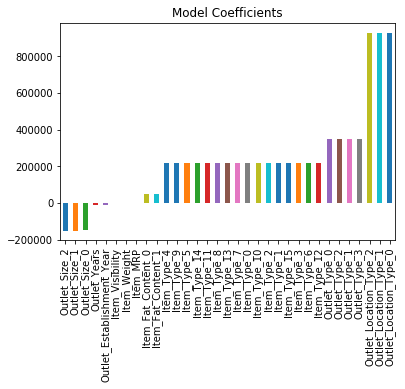

In [221]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
classificationModel(alg1, train, test, predictors, target, IDcol, os.path.join(folderPath,'linear_regression.csv'))
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

#### <font color='#76528D'>3. Ridge Regression Model</font>

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo


Model Report
RMSE : 1130
CV Score : Mean - 1133 | Std - 42.76 | Min - 1081 | Max - 1218


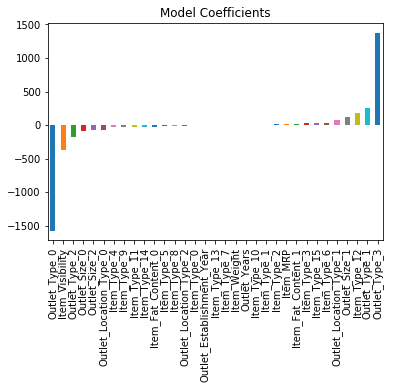

In [223]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
classificationModel(alg2, train, test, predictors, target, IDcol, os.path.join(folderPath,'ridge_regression.csv'))
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

#### <font color='#76528D'>4. Decision Tree</font>

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo


Model Report
RMSE : 1060
CV Score : Mean - 1089 | Std - 44.32 | Min - 1005 | Max - 1174


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


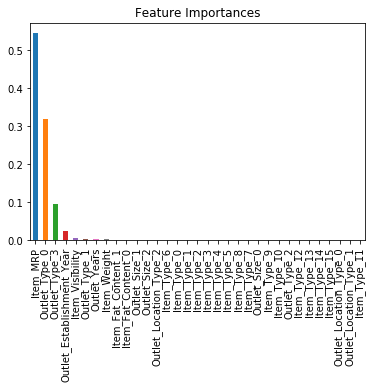

In [224]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
classificationModel(alg3, train, test, predictors, target, IDcol, os.path.join(folderPath,'decision_tree.csv'))
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

#### <font color='#76528D'>6. Random Forst Model</font>

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo


Model Report
RMSE : 1074
CV Score : Mean - 1083 | Std - 43.75 | Min - 1019 | Max - 1160


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


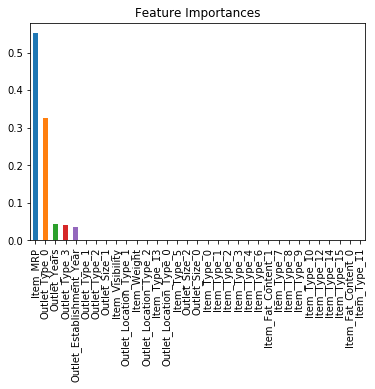

In [225]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
classificationModel(alg5, train, test, predictors, target, IDcol, os.path.join(folderPath,'random_forest.csv'))
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

#### <font color='#76528D'>7. Using XG Boost</font>

In [30]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = XGBRegressor()
classificationModel(alg6, train, test, predictors, target, IDcol, os.path.join(folderPath,'xg_boost.csv'))
coef5 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo


Model Report
RMSE : 1038
CV Score : Mean - 1082 | Std - 43.75 | Min - 1011 | Max - 1169


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AttributeError: 'XGBRegressor' object has no attribute 'feature_importances_'

In [228]:
#alg6.fit(train[predictors],train[target])
#predictions = alg6.predict(test[predictors])